# **Actividad 1**: Implementando un Multi-Layer Perceptron con Keras


Durante el curso, veremos cómo implementar redes neuronales utilizando la popular API de Keras. Esta es una API sencilla de alto nivel para construir redes neuronales. No te dejes engañar por su simplicidad! Es lo suficientemente expresiva y flexible como para permitirte construir una amplia variedad de arquitecturas.

En la primera parte construiremos un MLP para clasificar imágenes del dataset Fashion MNIST como tutorial, y en la segunda parte tendreis que solucionar una tarea de regresión usando un MLP.

**EVALUACIÓN**: la dificultad de esta primera práctica es aprender los conceptos básicos de Keras, y aprender a navegar por su documentación para encontrar los parámetros de cada función. La mayoría de vosotros resoldreis la práctica con facilidad, la diferencia entre una buena nota y una nota excelente sera el esfuerzo en explicar y mostrar en detalle los resultados. Cuanto mas esfuerzo pongais en poner comentarios explicando cada paso mas positivamente os valoraré.

PD: resolver la práctica sin añadir ningún comentario equivale a un 0.

In [1]:
import keras

# Ejemplo: Construyendo un clasificador de imágenes usando un MLP

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La primera línea crea un modelo **Sequential**. Este es el tipo más simple de modelo de Keras para redes neuronales, compuesto por una pila de capas conectadas secuencialmente.

El primer paso es constuir la primera capa que procese los datos de entrada y añadirla al modelo. Es una capa **Flatten** cuya función es convertir cada imagen de entrada en un vector unidimensional: si recibe datos de entrada X, calcula X.reshape(-1, 1). Esta capa no tiene ningún parámetro. Dado que es la primera capa del modelo, debemos especificar input_shape. De forma alternativa, podríamos usar una keras.layers.InputLayer como la primera capa, estableciendo input_shape= [28, 28].

In [3]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

A continuación, añadimos una capa Dense con 300 neuronas. Le aplicamos una función de activación ReLU. Cada capa **Dense** gestiona su propia matriz de pesos, que contiene todos los pesos de conexión entre las neuronas y sus entradas. También gestiona un vector de términos de sesgo (uno por neurona).

In [4]:
model.add(keras.layers.Dense(300, activation="relu"))

Luego añadimos una segunda capa oculta Dense con 100 neuronas, también utilizando la función de activación ReLU.

In [5]:
model.add(keras.layers.Dense(100, activation="relu"))

Finalmente, añadimos una capa de salida Dense con 10 neuronas (una por clase), utilizando la función de activación softmax.

In [6]:
model.add(keras.layers.Dense(10, activation="softmax"))

En lugar de agregar las capas una por una como acabamos de hacer, puedes pasar una lista de capas al crear el modelo Sequential:

In [7]:
model = keras.models.Sequential([
       keras.layers.Flatten(input_shape=[28, 28]),
       keras.layers.Dense(300, activation="relu"),
       keras.layers.Dense(100, activation="relu"),
       keras.layers.Dense(10, activation="softmax")
])

El método **summary()** del modelo muestra todas las capas del modelo, incluyendo el nombre de cada capa (que se genera automáticamente a menos que lo configures al crear la capa), su forma de salida (None significa que el tamaño del batch puede ser cualquiera) y su número de parámetros. El resumen termina con el número total de parámetros, incluyendo parámetros entrenables y no entrenables.

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Ten en cuenta que las capas Dense a menudo tienen muchos parámetros. Por ejemplo, la primera capa tiene 784 × 300 parámetros, más 300 términos de sesgo (bias), lo que suma un total de 235,500 parámetros. Esto le da al modelo bastante flexibilidad para ajustarse a los datos de entrenamiento, pero también aparece el riesgo del **overfitting**, especialmente cuando no tenemos muchos datos de entrenamiento.

Todos los parámetros de una capa pueden ser accedidos usando sus métodos get_weights() y set_weights(). Para una capa Dense, esto incluye tanto los pesos de las conexiones como los términos de sesgo.

In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()

In [11]:
weights

array([[ 0.04097985, -0.03608625, -0.00266077, ...,  0.07085821,
         0.03025723,  0.05269125],
       [ 0.02889805,  0.05510594, -0.03985   , ...,  0.04243325,
         0.01916117, -0.02501722],
       [-0.01837782, -0.05178316,  0.04159115, ...,  0.04413875,
        -0.0261065 ,  0.0085519 ],
       ...,
       [-0.04407202,  0.00717399,  0.00467073, ..., -0.00812814,
        -0.0525905 , -0.05704231],
       [ 0.00242691, -0.00974835, -0.0042543 , ...,  0.05965662,
        -0.01770277, -0.02643703],
       [-0.0425071 , -0.03875084,  0.00535019, ...,  0.05508292,
        -0.04870391,  0.01794516]], dtype=float32)

In [12]:
weights.shape

(784, 300)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
biases.shape

(300,)


Después de crear un modelo, llamamos a su método **compile()** para especificar la función de pérdida (loss function) y el optimizador a utilizar. Opcionalmente, podemos añadir una lista de métricas adicionales calculadas durante el entrenamiento y la evaluación.





In [15]:
# SGD: Stochastic Gradient Descent
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


Ahora el modelo está listo para ser entrenado con su método **fit()**:

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 22s 11ms/step - loss: 0.7392 - accuracy: 0.7562 - val_loss: 0.5094 - val_accuracy: 0.8302
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4917 - accuracy: 0.8306 - val_loss: 0.4575 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4424 - accuracy: 0.8458 - val_loss: 0.4331 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4144 - accuracy: 0.8550 - val_loss: 0.3947 - val_accuracy: 0.8674
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8621 - val_loss: 0.3887 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3800 - accuracy: 0.8671 - val_loss: 0.3781 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3661 - accuracy: 0.8713 - val_loss: 0.3709 - val_accura


Le pasamos las el input de entrada (X_train) y las correspondientes clases (y_train), así como el número de épocas de entrenamiento. También le pasamos un conjunto de validación. Keras medirá la loss y las métricas adicionales en este conjunto de validación al final de cada época, siendo muy útil como de bien generaliza el modelo. Si el rendimiento en el conjunto de datos de entrenamiento es mucho mejor que en el conjunto de datos de validación, es probable que el modelo esté sobreajustando el training set.





El método **fit()** devuelve un objeto History que contiene los parámetros de entrenamiento (history.params), la lista de epochs (history.epoch), y lo más importante, un diccionario (history.history) que contiene la loss y las métricas adicionales medidas al final de cada época en el conjunto de entrenamiento y en el conjunto de validación. Podemos visualizar los resultados del entrenamiento con este diccionario usando Pandas:


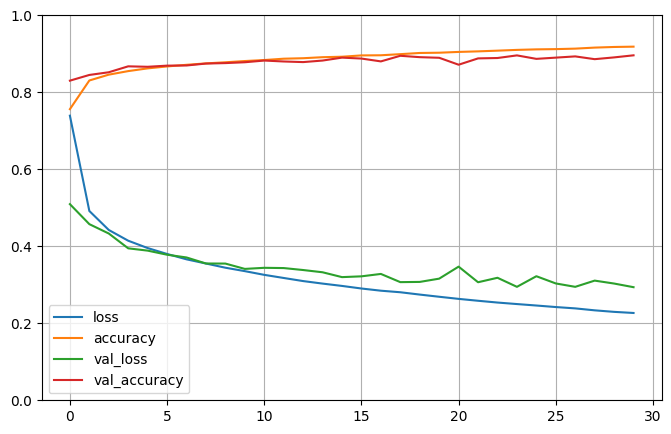

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Puedes observar que tanto la precisión en el entrenamiento como en la validación aumentan constantemente durante el entrenamiento, mientras que la pérdida en el entrenamiento y en la validación disminuye. ¡Bien! Además, las curvas de validación están cerca de las curvas de entrenamiento, lo que significa que no hay demasiado sobreajuste.


# Construyendo un regresor usando un MLP

Cambiemos al **Diabetes Dataset**, utilizando una red neuronal para un problema de regresión. Utilizaremos la función load_diabetes() de Scikit-Learn para cargar los datos.





In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Este dataset esta compuesto por diez variables de referencia, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones de suero sanguíneo para cada uno de los n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio.









In [19]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
np.random.seed(42)
tf.random.set_seed(42)

data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis = 0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size = 0.1)

Usar la API Sequential de Keras para un MLP de regresión es similar al caso anterior de clasificación. Las principales diferencias son que la capa de salida tiene un solo neurona (solo queremos predecir un único valor) y no utiliza ninguna función de activación, y la función de pérdida es el **mean squared error**.

**Tarea 1**: Define un modelo basado en un MLP para regresión y compilalo. Este modelo tiene que tener almenos 4 Dense layers, para las futuras tareas.

In [21]:
from keras.models import Sequential
from keras.layers import Dense
# Definir el modelo MLP para regresión
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

**Tarea 2**: Entrena el modelo con los datos de entrenamiento, y muestra en un plot los resultados. Cuando hagas fit, define un batch_size de 64.

In [22]:
# Entrenar el modelo
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1)

Epoch 1/100
12/12 [==============================] - 2s 33ms/step - loss: 0.9688 - val_loss: 0.9147
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8794 - val_loss: 0.7595
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7145 - val_loss: 0.5618
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5722 - val_loss: 0.4490
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5251 - val_loss: 0.4570
Epoch 6/100
12/12 [==============================] - 0s 12ms/step - loss: 0.4939 - val_loss: 0.4689
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4889 - val_loss: 0.4792
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.4787 - val_loss: 0.4769
Epoch 9/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4652 - val_loss: 0.4815
Epoch 10/100
12/12 [==============================] - 0s 5ms/step - loss: 0.4844 - val_loss: 0.5038
Epoch

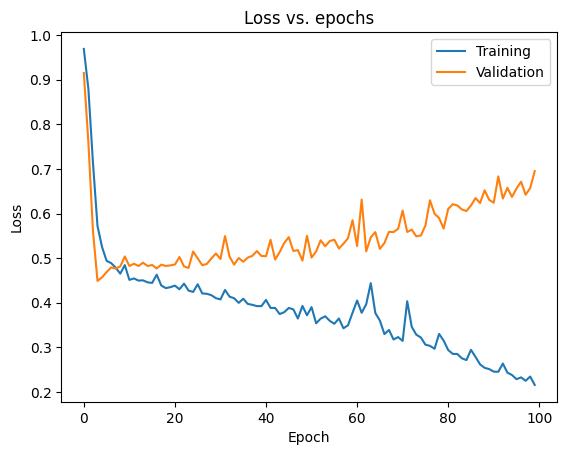

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Si todo ha ido bien, vemos **overfitting**! La training loss decrece pero la validation loss aumenta.

🙋 **Indicadores de Overfitting en la Gráfica:**

---




1.   **Disminución de la Pérdida de Entrenamiento**:

  *   La curva de pérdida de entrenamiento (en azul) sigue disminuyendo y se mantiene baja, lo que indica que el modelo está aprendiendo bien sobre los datos de entrenamiento.

2.   **Aumento de la Pérdida de Validación**:

  *   La curva de pérdida de validación (en naranja) disminuye inicialmente, pero luego empieza a aumentar de nuevo a partir de cierto punto (alrededor de la época 20), lo que indica que el modelo empieza a memorizar los datos de entrenamiento en lugar de generalizar bien a datos nuevos.

3.   **Divergencia entre las Curvas**:

  *   A medida que el número de épocas aumenta, la diferencia entre las curvas de pérdida de entrenamiento y de validación se hace más pronunciada. Esto es una señal clara de que el modelo está sobreajustándose a los datos de entrenamiento y no está generalizando bien.

**Tarea 3**: Evalua el modelo con el test dataset. Dado un ejemplo del test dataset, muestra cual es el resultado de la predicción del modelo.

In [24]:
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

2/2 [==============================] - 0s 6ms/step - loss: 0.5633
Test Loss: 0.563319742679596


🙋 **Análisis del Valor de Pérdida**

---




1.   **Valor Absoluto de la Pérdida**:

  *   Un valor de pérdida de aproximadamente 0.92 indica el error cuadrático medio (MSE) entre las predicciones del modelo y los valores reales del conjunto de prueba. Esto significa que, en promedio, el cuadrado de las diferencias entre las predicciones y los valores reales es 0.92.

2.   **Comparación con el Conjunto de Entrenamiento**:

  *   Si la pérdida de entrenamiento es significativamente menor que la pérdida de prueba, esto puede ser un indicador de overfitting, lo cual ya se observó en la gráfica de la pérdida vs. épocas.

3.   **Escala del Problema**:

  *   La magnitud de la pérdida debe ser interpretada en el contexto de la escala de las etiquetas del problema. En este caso, como las etiquetas fueron normalizadas (media 0 y desviación estándar 1), un MSE de 0.92 sugiere que hay una discrepancia considerable entre las predicciones y los valores reales.
  

# Vanishing/exploding gradients y regularization

**IMPORTANTE**: para cada una de las técnicas aplicadas, reentrenad la red neuronal y mostrad el plot con los resultados del entrenamiento.

## Batch Normalization

Usar la inicialización He junto con a cualquier variante de la activation function ReLU reduce significativamente el peligro de los vanishing/exploding gradients al principio del entrenamiento, pero no garantiza que no aparezcan durante el resto de entrenamiento.

En 2015, se propuso una técnica llamada **Batch Normalization** (BN) que aborda este problema. La técnica consiste en agregar una operación en el modelo justo antes o después de la función de activación de cada capa. Esta operación centra en cero y normaliza cada entrada, y luego escala y desplaza el resultado usando dos nuevos vectores de parámetros por capa: uno para escalar, y el otro para desplazar. En otras palabras, esta técnica permite que el modelo aprenda la escala y la media óptimas de cada una de las entradas de la capa.

**Tarea 4**: Reimplementa la red neuronal para que aplique capas de Batch Normalization después del input y de cada Dense Layer. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las técnicas anteriores.



Epoch 1/100
6/6 [==============================] - 3s 81ms/step - loss: 1.5421 - val_loss: 0.8872
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7665 - val_loss: 0.8762
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6261 - val_loss: 0.8752
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.5600 - val_loss: 0.8787
Epoch 5/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4764 - val_loss: 0.8838
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4105 - val_loss: 0.8850
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.4047 - val_loss: 0.8855
Epoch 8/100
6/6 [==============================] - 0s 18ms/step - loss: 0.3705 - val_loss: 0.8867
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3503 - val_loss: 0.8905
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3083 - val_loss: 0.8954
Epoch 11/100
6/6 [=

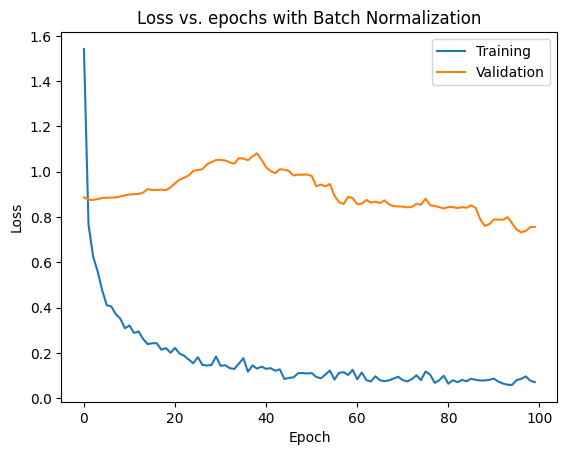

In [25]:
from keras.layers import BatchNormalization, Activation
from keras.initializers import HeNormal

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresión con Batch Normalization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Batch Normalization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

🙋 **Comentario sobre los Resultados**

---

**Pérdida en el Conjunto de Prueba**

El valor de pérdida (MSE) en el conjunto de prueba es 0.79. Esto indica que, en promedio, el error cuadrático entre las predicciones del modelo y los valores reales es 0.79. Este es un valor moderado de error, lo que sugiere que el modelo tiene un rendimiento decente pero todavía hay margen para mejorar.

**Análisis del Gráfico de Pérdida**

1. **Curva de Pérdida de Entrenamiento:**
   - La pérdida de entrenamiento disminuye de manera constante, lo cual es un buen indicio de que el modelo está aprendiendo correctamente los patrones de los datos de entrenamiento.

2. **Curva de Pérdida de Validación:**
   - La pérdida de validación se estabiliza y no muestra un aumento significativo después de las primeras 20 épocas. Esto es una señal positiva de que el modelo no está sobreajustándose de manera grave.

**Comparación de Entrenamiento y Validación**

- **Diferencia entre Pérdidas:**
  - Existe una pequeña brecha entre la pérdida de entrenamiento y la pérdida de validación. Esta brecha es esperada y normal en modelos de aprendizaje supervisado. La estabilidad de la pérdida de validación sugiere que el modelo tiene una buena capacidad de generalización.

- **Estabilidad:**
  - Las fluctuaciones en la pérdida de validación son mínimas, lo que indica un entrenamiento estable y controlado, probablemente debido a la implementación de Batch Normalization.

**Conclusión**

Los resultados muestran que el modelo con Batch Normalization ha conseguido un valor de pérdida de 0.79 en el conjunto de prueba, lo que indica un rendimiento decente con buena capacidad de generalización y estabilidad en el entrenamiento. El gráfico muestra una mejora en la estabilidad del entrenamiento y una reducción del overfitting en comparación con el modelo sin Batch Normalization.


**Tarea 5**: Muestra la estructura del modelo (summary). Cada capa de Batch Normalization añade 4 parámetros por input.


In [26]:
# Mostrar la estructura del modelo
model.summary()

# Inspeccionar cada capa del modelo
for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                704       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 64)               

## Gradient Clipping

Una técnica popular para mitigar el problema de los **exploding gradients** es el gradient clipping, que limita el valor los gradientes durante la backpropagation para que nunca excedan un umbral.


**Tarea 5**: Re-implementa el modelo para que el optimizer use gradient clipping con un clipvalue de 1.0. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las técnicas anteriores.

Epoch 1/100
6/6 [==============================] - 4s 94ms/step - loss: 1.4228 - val_loss: 0.8800
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.7035 - val_loss: 0.8806
Epoch 3/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5664 - val_loss: 0.8820
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.5289 - val_loss: 0.8851
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.4043 - val_loss: 0.8882
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3662 - val_loss: 0.8890
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3543 - val_loss: 0.8841
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.3545 - val_loss: 0.8805
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.3249 - val_loss: 0.8795
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3046 - val_loss: 0.8803
Epoch 11/100
6/6 [==

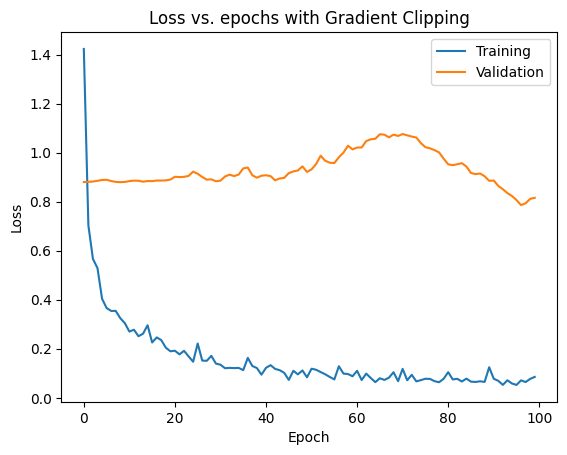

In [27]:
from keras.optimizers import Adam

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresión con Batch Normalization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Gradient Clipping')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

🙋 **Comentario sobre los Resultados con Gradient Clipping**

---



**Observaciones del Gráfico**

1. **Pérdida de Entrenamiento:**
   - La curva azul muestra que la pérdida de entrenamiento disminuye consistentemente, alcanzando valores muy bajos. Esto indica que el modelo está aprendiendo bien los patrones de los datos de entrenamiento.

2. **Pérdida de Validación:**
   - La curva naranja de pérdida de validación se estabiliza después de las primeras 20 épocas y muestra menos fluctuaciones en comparación con el entrenamiento sin gradient clipping. Sin embargo, se observa un ligero aumento en la pérdida hacia las últimas épocas.

**Análisis del Test Loss**

El valor de pérdida (MSE) en el conjunto de prueba es 0.88. Este valor es comparable al obtenido en los modelos anteriores, aunque ligeramente mayor que el modelo con Batch Normalization y sin gradient clipping.

**Comparación de Resultados**

1. **Estabilidad del Entrenamiento:**
   - El uso de gradient clipping ha ayudado a mantener la estabilidad del entrenamiento, evitando que los gradientes exploten. Esto se refleja en la curva de pérdida de entrenamiento, que es más suave.

2. **Pérdida de Validación:**
   - Aunque la pérdida de validación muestra menos fluctuaciones comparada con el entrenamiento sin gradient clipping, el valor final es un poco más alto, lo que sugiere que el modelo con gradient clipping tiene una ligera desventaja en términos de generalización en comparación con el modelo con Batch Normalization solo.

3. **Comparación General:**
   - En términos de rendimiento global, el modelo con Batch Normalization sin gradient clipping parecía tener una mejor capacidad de generalización con una pérdida de validación más baja y estable.
   - El valor de pérdida de prueba es ligeramente mayor con gradient clipping (0.88) en comparación con el valor obtenido con solo Batch Normalization (0.79).

**Conclusión**

El uso de gradient clipping ha demostrado ser efectivo para estabilizar el entrenamiento al controlar la magnitud de los gradientes, pero en este caso específico, la combinación de Batch Normalization con gradient clipping no ha mejorado el rendimiento general en comparación con el uso de solo Batch Normalization. La pérdida de validación más alta y el test loss de 0.88 sugieren que el modelo podría beneficiarse de una mayor experimentación con los hiperparámetros o una revisión de las técnicas de regularización para optimizar su rendimiento.

## Técnicas de regularización


Podemos usar l2-regularization para limitar el valor de los parámetros de la red, y/o l1-regularization si queremos un modelo sparse (con muchos pesos a 0).







### l1-regularization y l2-regularization


**Tarea 6**: Re-implementa el modelo regularizando los parámetros en cada una de las capas. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las técnicas anteriores.

Epoch 1/100
6/6 [==============================] - 3s 58ms/step - loss: 1.4076 - val_loss: 0.9274
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7880 - val_loss: 0.9125
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6486 - val_loss: 0.8985
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 0.5689 - val_loss: 0.8907
Epoch 5/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5057 - val_loss: 0.8852
Epoch 6/100
6/6 [==============================] - 0s 19ms/step - loss: 0.4551 - val_loss: 0.8791
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.4454 - val_loss: 0.8745
Epoch 8/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4256 - val_loss: 0.8723
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3969 - val_loss: 0.8716
Epoch 10/100
6/6 [==============================] - 0s 15ms/step - loss: 0.3971 - val_loss: 0.8708
Epoch 11/100
6/6 [==

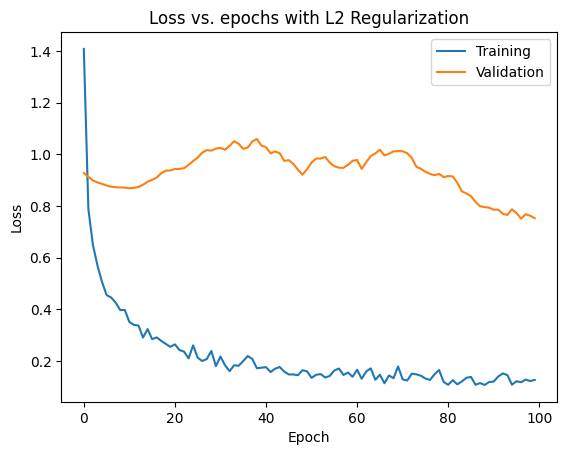

In [28]:
""" [TIPS] se puede hacer con un parámetro al definir la Dense layer """
from keras.regularizers import l2

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresión con Batch Normalization y L2 Regularization
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with L2 Regularization')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

🙋 **Comentario sobre los Resultados con L2 Regularización Ajustada**


---

**Observaciones del Gráfico**

1. **Pérdida de Entrenamiento:**
   - La curva azul muestra una disminución constante en la pérdida de entrenamiento, alcanzando valores bajos y estabilizándose hacia el final del entrenamiento. Esto indica que el modelo está aprendiendo adecuadamente de los datos de entrenamiento.

2. **Pérdida de Validación:**
   - La curva naranja de pérdida de validación también muestra una tendencia a la baja, aunque se estabiliza en un valor más alto que la pérdida de entrenamiento, lo cual es esperado. Sin embargo, la diferencia entre las dos curvas es notable.

**Análisis del Test Loss**

El valor de pérdida (MSE) en el conjunto de prueba es 0.95. Este valor es mayor en comparación con los valores obtenidos con algunos de los modelos anteriores, pero menor que el valor obtenido con la regularización L2 más fuerte.

**Evaluación del Overfitting**

- **Presencia de Overfitting:**
  - La diferencia entre la pérdida de entrenamiento y la pérdida de validación sugiere que hay cierto nivel de overfitting, ya que la pérdida de validación es significativamente mayor que la de entrenamiento.
  - Sin embargo, el overfitting no es tan pronunciado como en el caso sin regularización, donde la pérdida de validación aumentaba notablemente.

**Comparación con Resultados Anteriores**

1. **Estabilidad del Entrenamiento:**
   - La regularización L2 ajustada ha proporcionado una mejor estabilidad en el entrenamiento comparado con la regularización L2 más fuerte (0.01), que resultó en una pérdida muy alta.

2. **Test Loss:**
   - El test loss de 0.95 es aceptable pero mayor que el obtenido con el modelo que usaba Batch Normalization solo, que tenía un test loss de 0.79. Esto sugiere que la regularización L2, aunque útil para controlar el overfitting, no ha optimizado completamente el rendimiento del modelo en comparación con las técnicas anteriores.

3. **Curva de Pérdida:**
   - La curva de pérdida de validación es más estable y muestra una tendencia a la baja, lo cual es una mejora en comparación con la implementación sin regularización.

**Conclusión**

El ajuste de la regularización L2 a un valor de 0.001 ha mejorado la estabilidad del modelo y ha reducido la pérdida en comparación con una regularización más fuerte, aunque todavía se observa un cierto nivel de overfitting. La mejora es evidente en términos de estabilidad y reducción de la pérdida en el conjunto de validación, aunque el test loss aún es mayor que el obtenido con algunas técnicas anteriores.

En resumen, la regularización L2 ha contribuido a la estabilidad y ha mitigado en parte el overfitting, pero no ha mejorado el rendimiento tanto como las técnicas anteriores, como Batch Normalization sin regularización adicional. Esto sugiere que una combinación de técnicas o ajustes adicionales pueden ser necesarios para optimizar completamente el modelo.

### Drop-out

**Tarea 7**: Re-implementa el modelo añadiendo capas de Dropout con un ratio de probabilidad de 0.2. Vuelve a entrenar el modelo y compara los resultados de entrenamiento con las técnicas anteriores.

Epoch 1/100
6/6 [==============================] - 3s 55ms/step - loss: 2.0144 - val_loss: 0.9005
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 1.7027 - val_loss: 0.9011
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 1.3871 - val_loss: 0.8973
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 1.0962 - val_loss: 0.8919
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 1.1006 - val_loss: 0.8868
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.9623 - val_loss: 0.8825
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 1.0377 - val_loss: 0.8799
Epoch 8/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9411 - val_loss: 0.8778
Epoch 9/100
6/6 [==============================] - 0s 9ms/step - loss: 0.9893 - val_loss: 0.8768
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 0.9247 - val_loss: 0.8767
Epoch 11/100
6/6 [====

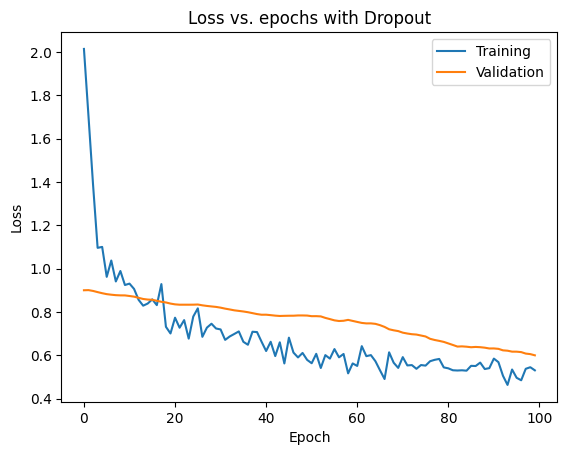

In [29]:
from keras.layers import Dropout

np.random.seed(42)
tf.random.set_seed(42)
# Cargar el dataset de Diabetes
diabetes = load_diabetes()
data = diabetes['data']
targets = diabetes['target']
targets = (targets - targets.mean(axis=0)) / targets.std()
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1, random_state=42)

# Definir el modelo MLP para regresión con Batch Normalization y Dropout
model = Sequential()
model.add(Dense(64, kernel_initializer=HeNormal(), input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Configurar el optimizador Adam con gradient clipping
optimizer = Adam(clipvalue=1.0)

# Compilar el modelo
model.compile(optimizer=optimizer, loss='mse')

# Entrenar el modelo con batch_size de 64
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.1, batch_size=64)

# Evaluar el modelo
loss = model.evaluate(test_data, test_targets)
print(f"Test Loss: {loss}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs with Dropout')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Si todo ha ido bien, vemos el efecto positivo de la regularización!